In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
data = pd.read_csv("data/student_sleep_patterns.csv")
data.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data.columns.to_list()

['Student_ID',
 'Age',
 'Gender',
 'University_Year',
 'Sleep_Duration',
 'Study_Hours',
 'Screen_Time',
 'Caffeine_Intake',
 'Physical_Activity',
 'Sleep_Quality',
 'Weekday_Sleep_Start',
 'Weekend_Sleep_Start',
 'Weekday_Sleep_End',
 'Weekend_Sleep_End']

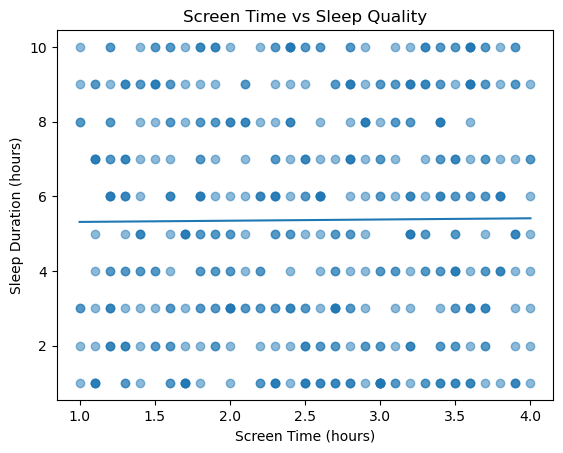

In [10]:
x = data["Screen_Time"]
y = data["Sleep_Quality"]

plt.figure()
plt.scatter(x, y, alpha=0.5)
m, b = np.polyfit(x.dropna(), y.loc[x.dropna().index].dropna(), 1)
xs = np.linspace(x.min(), x.max(), 200)
plt.plot(xs, m*xs + b)

plt.title("Screen Time vs Sleep Quality")
plt.xlabel("Screen Time (hours)")
plt.ylabel("Sleep Duration (hours)")
plt.show()

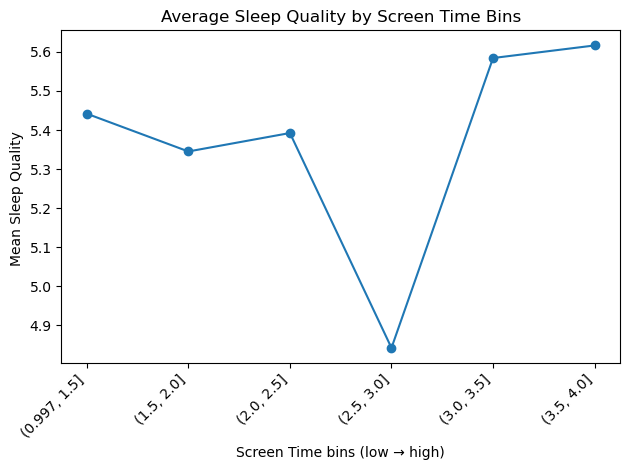

In [11]:
tmp = data[["Screen_Time", "Sleep_Quality"]].dropna().copy()

tmp["Screen_bin"] = pd.cut(tmp["Screen_Time"], bins=6)
bin_means = tmp.groupby("Screen_bin", observed=True)["Sleep_Quality"].mean()
bin_counts = tmp.groupby("Screen_bin", observed=True)["Sleep_Quality"].size()

plt.figure()
plt.plot(range(len(bin_means)), bin_means.values, marker="o")
plt.title("Average Sleep Quality by Screen Time Bins")
plt.xlabel("Screen Time bins (low → high)")
plt.ylabel("Mean Sleep Quality ")
plt.xticks(range(len(bin_means)), [str(b) for b in bin_means.index], rotation=45, ha="right")
plt.tight_layout()
plt.show()

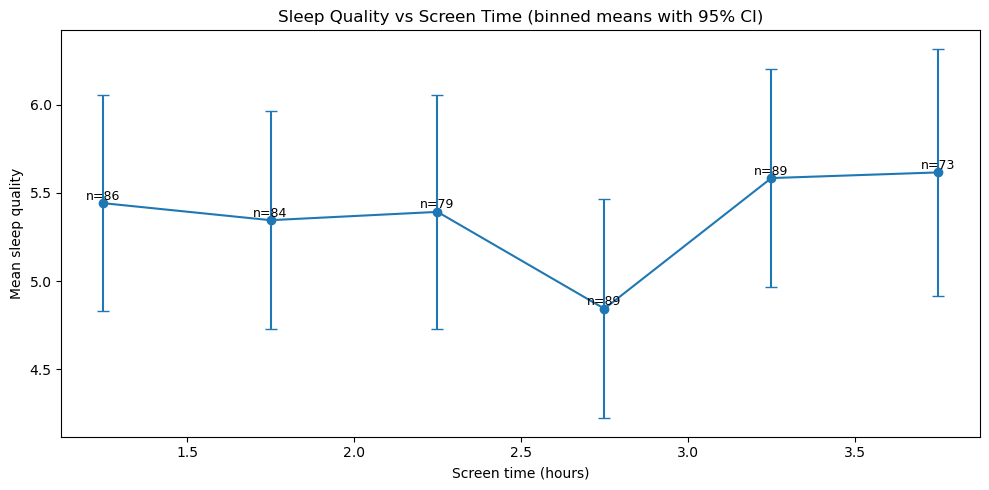

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tmp = data[["Screen_Time", "Sleep_Quality"]].dropna().copy()

# choose bins you like (6 is fine)
tmp["bin"] = pd.cut(tmp["Screen_Time"], bins=6)

stats = tmp.groupby("bin", observed=True)["Sleep_Quality"].agg(["mean", "std", "count"]).reset_index()

# compute bin midpoints for x-axis (clean numeric axis)
stats["mid"] = stats["bin"].apply(lambda b: (b.left + b.right) / 2)
stats["se"]  = stats["std"] / np.sqrt(stats["count"])

plt.figure(figsize=(10, 5))

# mean line with markers
plt.plot(stats["mid"], stats["mean"], marker="o")

# 95% CI error bars (makes it look inferential)
plt.errorbar(stats["mid"], stats["mean"], yerr=1.96*stats["se"], fmt="none", capsize=4)

plt.title("Sleep Quality vs Screen Time (binned means with 95% CI)")
plt.xlabel("Screen time (hours)")
plt.ylabel("Mean sleep quality")

# annotate counts above points
for x, y, n in zip(stats["mid"], stats["mean"], stats["count"]):
    plt.text(x, y + 0.02, f"n={int(n)}", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

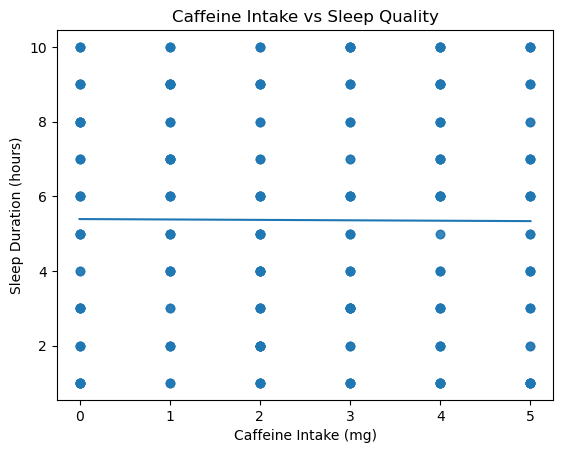

In [13]:
x = data["Caffeine_Intake"]
y = data["Sleep_Quality"]

plt.figure()
plt.scatter(x, y, alpha=0.5)
x2 = x.dropna()
y2 = y.loc[x2.index].dropna()
x2 = x2.loc[y2.index]
m, b = np.polyfit(x2, y2, 1)
xs = np.linspace(x2.min(), x2.max(), 200)
plt.plot(xs, m*xs + b)

plt.title("Caffeine Intake vs Sleep Quality")
plt.xlabel("Caffeine Intake (mg)")
plt.ylabel("Sleep Duration (hours)")
plt.show()

/var/folders/8t/x329s8055vdgtxtnhtz6vkzr0000gn/T/ipykernel_72773/3281297345.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tmp["Weekday_Sleep_Start"], tmp["Weekend_Sleep_Start"]],


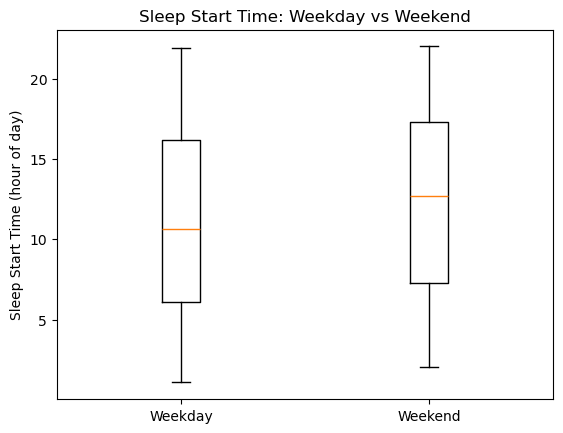

In [8]:
cols = ["Weekday_Sleep_Start", "Weekend_Sleep_Start"]
tmp = data[cols].dropna()

plt.figure()
plt.boxplot([tmp["Weekday_Sleep_Start"], tmp["Weekend_Sleep_Start"]],
            labels=["Weekday", "Weekend"])
plt.title("Sleep Start Time: Weekday vs Weekend")
plt.ylabel("Sleep Start Time (hour of day)")
plt.show()

In [12]:
import statsmodels.api as sm

# Select variables
cols = [
    "Sleep_Duration",
    "Screen_Time",
    "Caffeine_Intake",
    "Physical_Activity",
    "Study_Hours",
    "Sleep_Quality"
]

df_model = data[cols].dropna()

# Response and predictors
y = df_model["Sleep_Quality"]
X = df_model.drop(columns="Sleep_Quality")

# Add intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Sleep_Quality   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.3997
Date:                Mon, 19 Jan 2026   Prob (F-statistic):              0.849
Time:                        20:26:14   Log-Likelihood:                -1251.8
No. Observations:                 500   AIC:                             2516.
Df Residuals:                     494   BIC:                             2541.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.2523      0.80